In [3]:
import os
import glob
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt

In [4]:
output_dir = "all_pages_clean"
os.makedirs(output_dir, exist_ok=True)

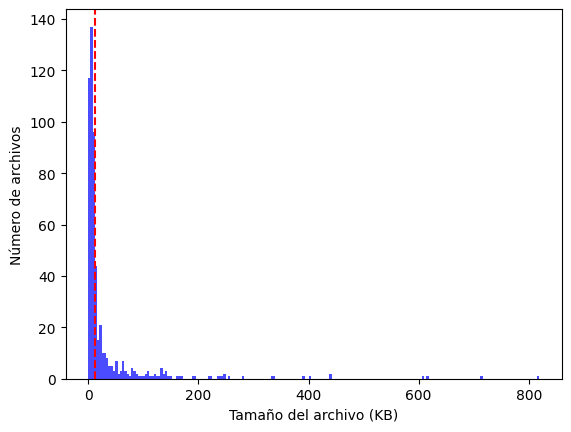

In [6]:
limit = 13 # KB
sizes = [os.path.getsize(os.path.join(output_dir, f))/1024 for f in os.listdir(output_dir)]
plt.hist(sizes, bins=200, color='blue', alpha=0.7)
plt.xlabel("Tamaño del archivo (KB)")
plt.ylabel("Número de archivos")
plt.axvline(x=limit, color='r', linestyle='--', label=f'Límite {limit}KB')
plt.show()

In [2]:
# Directorios
REF_DIR = "all_pages"
HYP_DIR = "all_pages_clean"

# Creamos el "scorer" para ROUGE-L (con stemming opcional)
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

rouge_l_f1_scores = []

for ref_path in glob.glob(os.path.join(REF_DIR, "*.html")):
    filename = os.path.basename(ref_path)
    hyp_path = os.path.join(HYP_DIR, filename[:-4] + "txt")

    # Si no existe la predicción correspondiente, la saltamos
    if not os.path.exists(hyp_path):
        print(f"[AVISO] No encontré hipótesis para {filename}, lo salto.")
        continue

    # Leemos referencia e hipótesis
    with open(ref_path, "r", encoding="utf-8") as f:
        ref_text = f.read().strip()

    with open(hyp_path, "r", encoding="utf-8") as f:
        hyp_text = f.read().strip()

    # Calculamos ROUGE-L
    score = scorer.score(ref_text, hyp_text)['rougeL']

    # Guardamos el F1 para promediar luego
    rouge_l_f1_scores.append(score.fmeasure)

    print(f"{filename}")
    print(f"  ROUGE-L Recall:    {score.recall:.4f}")
    print(f"  ROUGE-L Precision: {score.precision:.4f}")
    print(f"  ROUGE-L F1:        {score.fmeasure:.4f}")
    print("-" * 40)

# Promedio de ROUGE-L F1 en todo el directorio
if rouge_l_f1_scores:
    avg_rouge_l_f1 = sum(rouge_l_f1_scores) / len(rouge_l_f1_scores)
    print(f"ROUGE-L F1 promedio en el corpus: {avg_rouge_l_f1:.4f}")
else:
    print("No se calcularon scores (¿no hubo pares ref/hyp?).")


0075.html
  ROUGE-L Recall:    0.1733
  ROUGE-L Precision: 1.0000
  ROUGE-L F1:        0.2954
----------------------------------------


KeyboardInterrupt: 